# UWAGA: 
**Każde zadanie powinno być rozwiązane w osobnych komórkach notebooka.
Wstaw odpowiednie komentarze i wyjaśnienia do kodu.**

Użyj bibliotek pandas, seaborn i matplotlib.pyplot, aby wykonać następujące kroki analizy:

## 1. Wczytanie i wstępne zapoznanie się z danymi
Załaduj zbiór danych do obiektu DataFrame.
Wyświetl pierwsze kilka wierszy (`.head()`).
Sprawdź podstawowe informacje o danych (`.info()`, `.describe()`).
Zweryfikuj, czy występują wartości brakujące (`.isnull().sum()`).
## 2. Analiza statystyczna
Oblicz podstawowe statystyki opisowe dla zmiennych numerycznych (średnia, mediana, odchylenie standardowe).
Zidentyfikuj wartości odstające w kluczowych kolumnach, np. emisji CO₂ (np. wykres `boxplot`).
Sprawdź współczynniki korelacji pomiędzy zmiennymi numerycznymi (`df[kolumny_numeryczne].corr()`).
## 3. Wizualizacja danych
### Histogramy:

Wykreśl histogram emisji CO₂, aby zobaczyć rozkład tej zmiennej.
Sprawdź, jak wygląda rozkład innych kluczowych zmiennych numerycznych.
### Boxploty:

Stwórz wykres pudełkowy (`boxplot`) emisji CO₂ w podziale na kategorie np. typ paliwa lub producenta pojazdu.
### Korelacje:

Wykonaj wykres korelacji (heatmapa) przy użyciu `seaborn.heatmap()`. Sprawdź w internecie jak z niej korzystać.
Wykonaj wykres punktowy (scatter plot) dla emisji CO₂ w odniesieniu do mocy silnika lub innej istotnej zmiennej.
## 4. Wnioski
Podsumuj swoje obserwacje: Jakie zależności udało się zauważyć?
Czy dane zawierają wartości odstające? Jeśli tak, to które?
Jakie zmienne są najsilniej skorelowane z emisją CO₂?


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Wczytanie danych CO2
df = pd.read_csv("https://raw.githubusercontent.com/jisokolowski/labaJDA/main/input/co2_emmission/CO2_emission.csv")
display(df)



,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7
...,...,...,...,...,...,...,...,...,...,...,...,...
930,2021,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,10.7,7.7,9.4,219,5
931,2021,Volvo,XC60 T5 AWD,SUV: Small,2.0,4,AS8,11.1,8.3,9.9,230,5
932,2021,Volvo,XC60 T6 AWD,SUV: Small,2.0,4,AS8,11.7,8.6,10.3,240,7
933,2021,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,11.5,8.4,10.1,236,5


In [4]:
#zadanie 1

# Wyświetlenie pierwszych kilku wierszy
print("Pierwsze kilka wierszy:")
print(df.head())

# Sprawdzenie podstawowych informacji o danych
print("Podstawowe informacje o danych:")
print(df.info())

# Statystyki opisowe
print("Statystyki opisowe:")
print(df.describe())

# Weryfikacja wartości brakujących
print("Wartości brakujące:")
print(df.isnull().sum())



Pierwsze kilka wierszy:
   Model_Year   Make              Model Vehicle_Class  Engine_Size  Cylinders  \
0        2021  Acura                ILX       Compact          2.4          4   
1        2021  Acura                NSX    Two-seater          3.5          6   
2        2021  Acura         RDX SH-AWD    SUV: Small          2.0          4   
3        2021  Acura  RDX SH-AWD A-SPEC    SUV: Small          2.0          4   
4        2021  Acura         TLX SH-AWD       Compact          2.0          4   

  Transmission  Fuel_Consumption_in_City(L/100 km)  \
0          AM8                                 9.9   
1          AM9                                11.1   
2         AS10                                11.0   
3         AS10                                11.3   
4         AS10                                11.2   

   Fuel_Consumption_in_City_Hwy(L/100 km)  Fuel_Consumption_comb(L/100km)  \
0                                     7.0                             8.6   
1         

wyniki dla średnia:
Model_Year                                2021.000000
Engine_Size                                  3.214866
Cylinders                                    5.716578
Fuel_Consumption_in_City(L/100 km)          12.498610
Fuel_Consumption_in_City_Hwy(L/100 km)       9.306203
Fuel_Consumption_comb(L/100km)              11.060214
CO2_Emissions                              258.529412
Smog_Level                                   4.726203
dtype: float64
wyniki dla odchylenia standardowego:
Model_Year                                 0.000000
Engine_Size                                1.388513
Cylinders                                  1.977359
Fuel_Consumption_in_City(L/100 km)         3.487271
Fuel_Consumption_in_City_Hwy(L/100 km)     2.215819
Fuel_Consumption_comb(L/100km)             2.867028
CO2_Emissions                             64.442768
Smog_Level                                 1.712127
dtype: float64
wyniki dla mediany:
Model_Year                                202

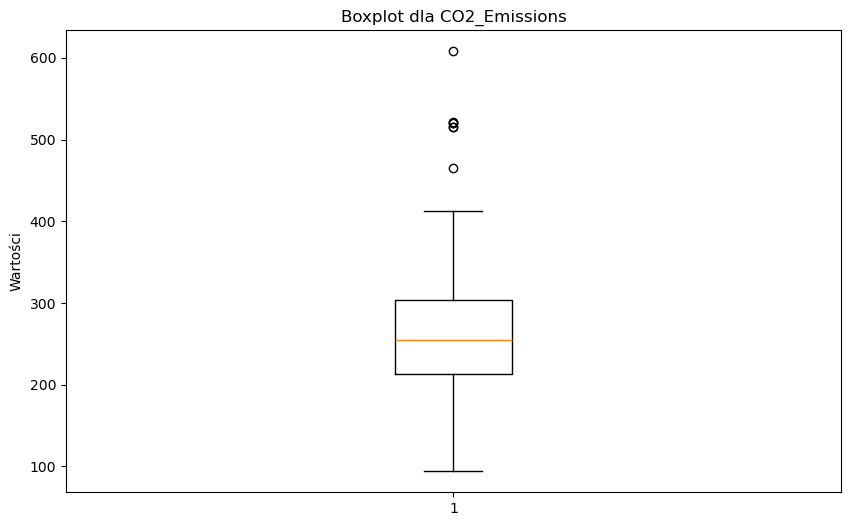

                                        Model_Year  Engine_Size  Cylinders  \
Model_Year                                     NaN          NaN        NaN   
Engine_Size                                    NaN     1.000000   0.918483   
Cylinders                                      NaN     0.918483   1.000000   
Fuel_Consumption_in_City(L/100 km)             NaN     0.833345   0.842551   
Fuel_Consumption_in_City_Hwy(L/100 km)         NaN     0.748928   0.742968   
Fuel_Consumption_comb(L/100km)                 NaN     0.817541   0.821770   
CO2_Emissions                                  NaN     0.825725   0.834972   
Smog_Level                                     NaN    -0.504544  -0.532742   

                                        Fuel_Consumption_in_City(L/100 km)  \
Model_Year                                                             NaN   
Engine_Size                                                       0.833345   
Cylinders                                                      

In [14]:
#zadanie 2

wybrane_kolumny = df.select_dtypes(include=[np.number])

średnia = wybrane_kolumny.mean()
print('wyniki dla średnia:')
print(średnia)

odchylenie_standardowe = wybrane_kolumny.std()
print('wyniki dla odchylenia standardowego:')
print(odchylenie_standardowe)

mediana = wybrane_kolumny.median()
print('wyniki dla mediany:') 
print(mediana)

#BOXPLOT emisji CO₂ 

plt.figure(figsize=(10, 6))
plt.boxplot(df['CO2_Emissions'])
plt.title('Boxplot dla CO2_Emissions')
plt.ylabel('Wartości')
plt.show()

#współczynniki korelacji

korelacja = wybrane_kolumny.corr()
print(korelacja)


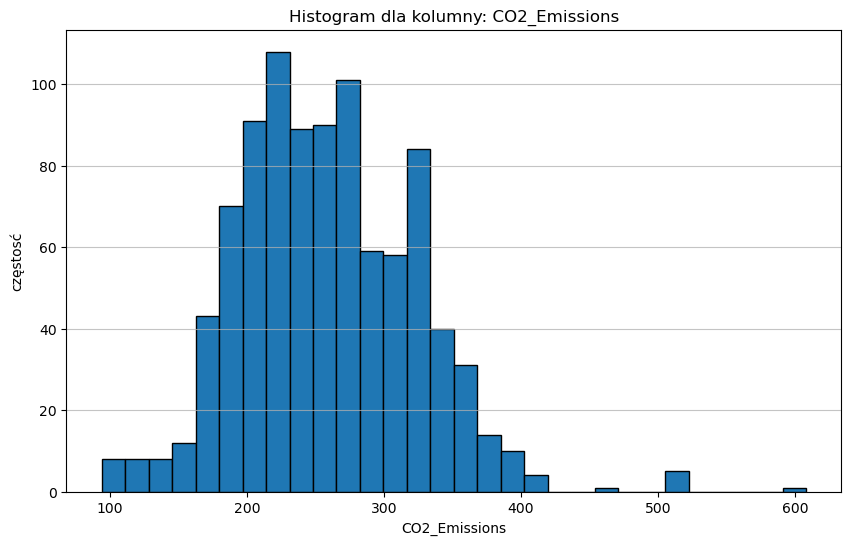

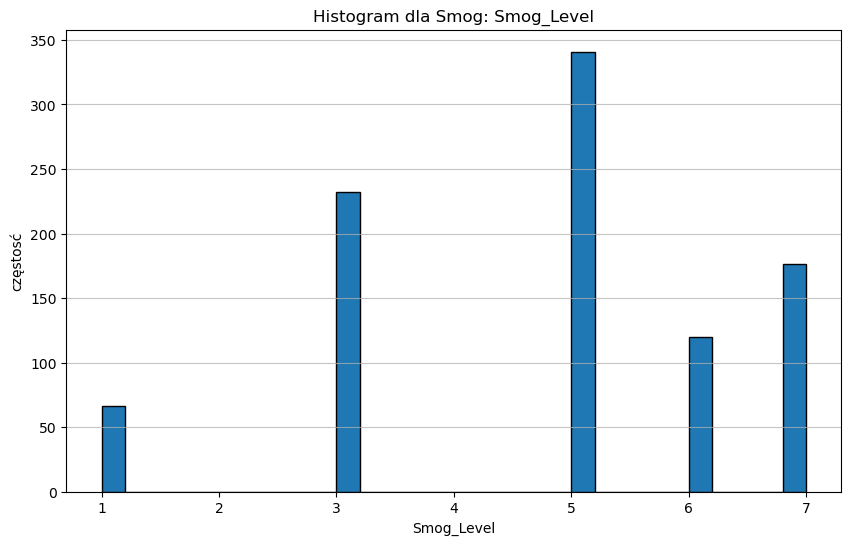

In [6]:
# zadanie 3
# Histogram emisji CO₂

kolumna = 'CO2_Emissions'

plt.figure(figsize=(10, 6))
plt.hist(df[kolumna], bins=30, edgecolor='black')  # Możesz dostosować liczbę binów
plt.title(f'Histogram dla kolumny: {kolumna}')
plt.xlabel(kolumna)
plt.ylabel('częstosć')
plt.grid(axis='y', alpha=0.75)
plt.show()


kolumna1 = 'Smog_Level'
plt.figure(figsize=(10, 6))
plt.hist(df[kolumna1], bins=30, edgecolor='black')
plt.title(f'Histogram dla Smog: {kolumna1}')
plt.xlabel(kolumna1)
plt.ylabel('częstosć')
plt.grid(axis='y', alpha=0.75)
plt.show()

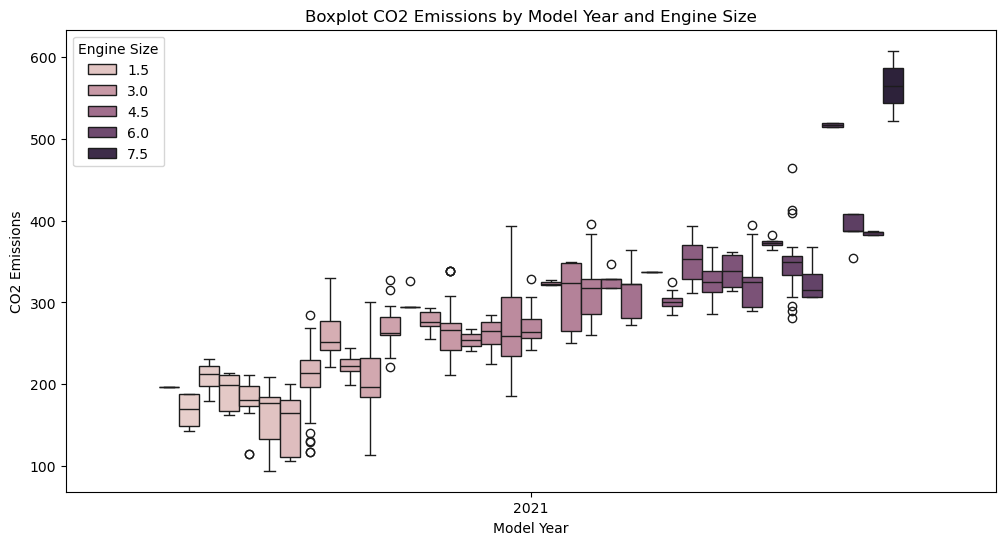

In [8]:
# zadanie 3
# boxplot podział na kategorie

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model_Year', y='CO2_Emissions', hue='Engine_Size', data=df)
plt.title('Boxplot CO2 Emissions by Model Year and Engine Size')
plt.xlabel('Model Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Engine Size')
plt.show()


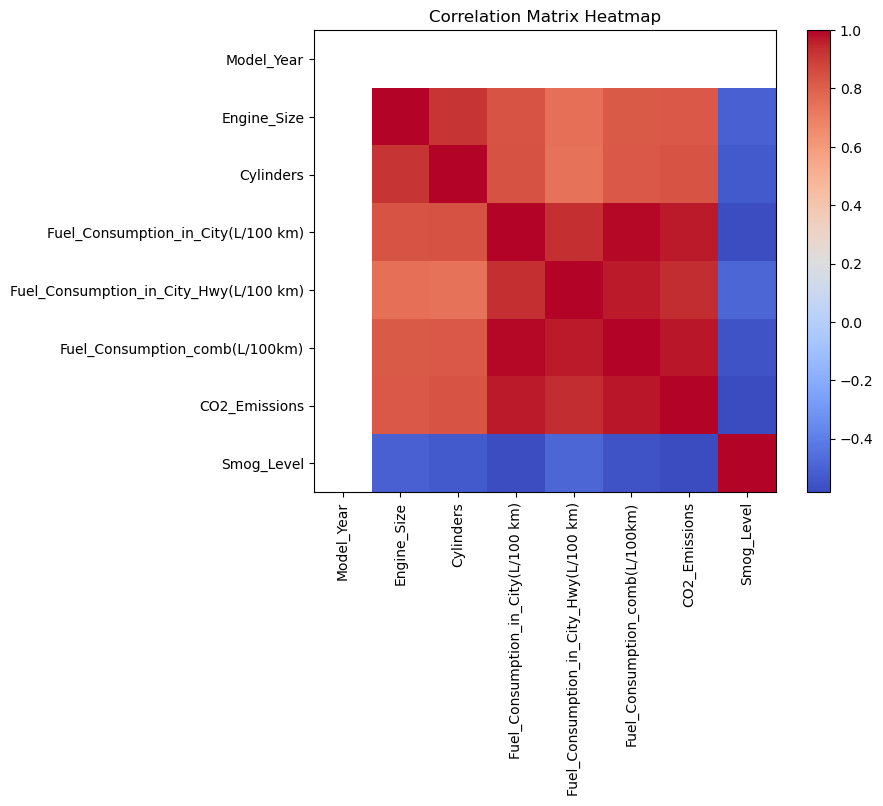

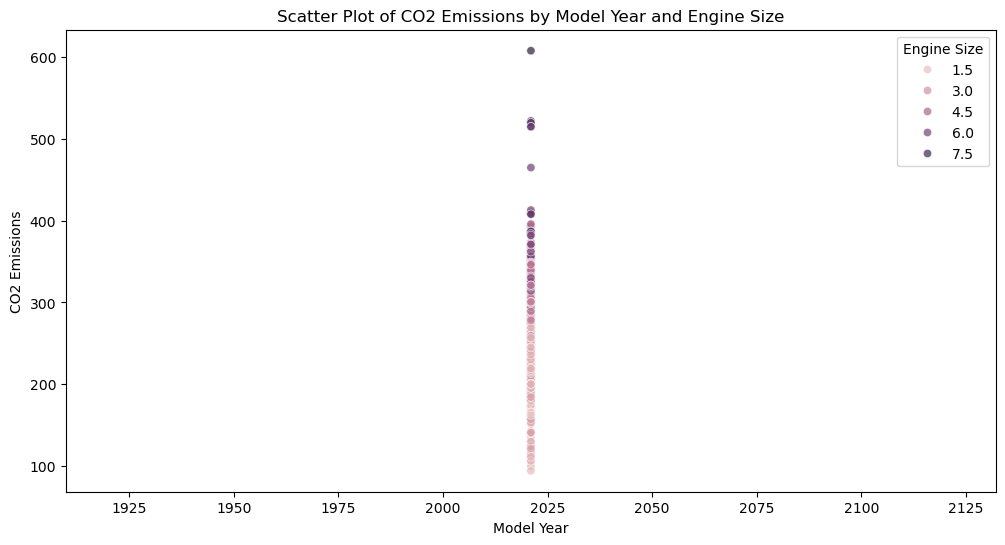

In [16]:
# zadanie 3 Wykonaj wykres korelacji 


numeryczne_dane_df = df.select_dtypes(include=[np.number])

korelacja = numeryczne_dane_df.corr()

plt.figure(figsize=(8, 6))  
plt.imshow(korelacja , cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Matrix Heatmap')
plt.xticks(range(len(korelacja.columns)), korelacja.columns, rotation=90)
plt.yticks(range(len(korelacja.columns)), korelacja.columns)
plt.show()

# wykres punktowy

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Model_Year', y='CO2_Emissions', hue='Engine_Size', data=df, alpha=0.7)
plt.title('Scatter Plot of CO2 Emissions by Model Year and Engine Size')
plt.xlabel('Model Year')
plt.ylabel('CO2 Emissions')
plt.legend(title='Engine Size')
plt.show()

# zadanie 4

Wysoka korelacja między liczbą cylindrów a: 
1. rozmiarem śilnika: większy rozmiar silnika zazwyczaj wiąże się z większą liczbą cylindrów
2. zużyciem paliwa: pojazdy z większą liczbą cylindrów mają tendencję do większego zużycia paliwa


Silna korelacja między zużyciem paliwa a:
1. emisją CO2: pojazdy o wyższym zużyciu paliwa emitują więcej CO2
2. miarami zużycia paliwa(w mieście, na autostradzie, oraz w kombinacji) pojazd ma wysokie zużycie paliwa w jednej kategorii, będzie miał wysokie zużycie także w innych kategoriach
   
Rok produkcji samochodu nie ma bezpośredniego związku z innymi zmiennymi w zestawie danych

Podsumowując, zmienne, które są najsilniej skorelowane z emisją CO₂ to:

Fuel_Consumption_comb(L/100km)
Fuel_Consumption_in_City(L/100 km)
Fuel_Consumption_in_City_Hwy(L/100 km)
Cylinders
Engine_Size




